<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/LibRosaSoundFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install librosa
!pip install soundfile

In [13]:
from google.colab import files
uploaded = files.upload()

Saving bass.wav to bass.wav


(20, 1359)
[-545.39715138 -524.42462488 -498.01875484 ... -689.31751178 -692.6330127
 -694.58216403]


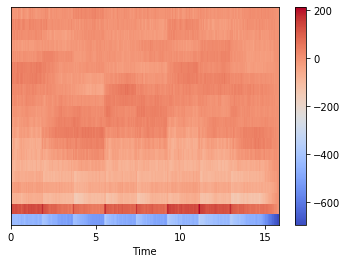

In [17]:
# https://qiita.com/tmtakashi_dist/items/eecb705ea48260db0b62 を参考に
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display

x, fs = sf.read('chord.wav')
mfccs = librosa.feature.mfcc(x.transpose()[0], sr=fs)
print(mfccs.shape)
# (n_mfcc, sr*duration/hop_length)
# DCT したあとで取得する係数の次元(デフォルト20) , サンプリングレートxオーディオファイルの長さ（=全フレーム数）/ STFTスライドサイズ(デフォルト512)
print(mfccs[0])

librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()
plt.show()

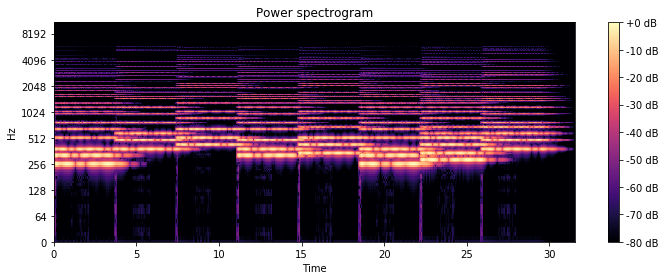

In [18]:
# 短時間フーリエ変換
S = np.abs(librosa.stft(x.transpose()[0]))
 
# 画像出力
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
 
plt.tight_layout()
plt.show()